In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
import requests
import math
import re
import csv
import mplhep as hep

## Comparing Run 2 and Run 3 trigger rates: checking single- and double-objects seeds representative of each object type

#### Ephemeral HLTPhysics 2022 (Run D, 9 parts) - run 357688 (nBunches = 2400): 5150338 events (50 LS in LS = [35,84] for PU=52: 939081 events)
L1Ntuples ZBHLTPhysics2022: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run357688/
 
*NOTE* that files from part 7 and 8 are not available...

#### Ephemeral HLTPhysics 2018 (Run D, 8 parts) - run 325097 (nBunches = 2544): 626090 events (36 LS in LS = [58,93] for PU=52: 469101 events)                                                                                                                                                                        
L1Ntuples ZBHLTPhysics2018: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run325097/

In [2]:
# Countings and thresholds + Lists for rate computation
# MU #
mu_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26, 27]
n_SingleMu_CountingsRun2 =  [46348, 43566, 42052, 39303, 36742, 34523, 30116, 28259]
n_SingleMu_CountingsRun3 =  [110955, 108030, 104805, 97177, 87636, 81895, 77098, 71611]
rate_muon_algo_Run2 = []
rate_muon_algo_Run3 = []

# EG #
eg_pt_thresholds =  [32, 33, 34, 35, 36, 37, 38, 39, 40]
n_SingleEG_CountingsRun2 =  [112899, 104374, 95531, 87057, 79504, 72904, 66818, 61126, 55919]
n_SingleEG_CountingsRun3 =  [194771, 178959, 164366, 149748, 135392, 124147, 113134, 103626, 94710]
rate_eg_algo_Run2 = []
rate_eg_algo_Run3 = []
doubleeg_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26]
n_DoubleLooseIsoEG_CountingsRun2 =  [2226, 2038, 1852, 1701, 1562, 1469, 1396]
n_DoubleLooseIsoEG_CountingsRun3 =  [5735, 5190, 4741, 4376, 4081, 3808, 3574]
rate_doubleeg_algo_Run2 = []
rate_doubleeg_algo_Run3 = []

# TAU #
tau_pt_thresholds =  [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
n_SingleTau_CountingsRun2 =  [13388, 13066, 12768, 12484, 12206, 11927, 11688, 11418, 11180, 10923, 10716]
n_SingleTau_CountingsRun3 =  [19787, 19262, 18737, 18267, 17800, 17376, 16951, 16509, 16061, 15663, 15255]
rate_tau_algo_Run2 = []
rate_tau_algo_Run3 = []
doubleisotau_pt_thresholds =  [30, 31, 32, 33, 34, 35, 36]
n_DoubleIsoTau_CountingsRun2 =   [90452, 87392, 85213, 76311, 68096, 61889, 57153] 
n_DoubleIsoTau_CountingsRun3 =  [149721, 142400, 136772, 123673, 111707, 101340, 91308]
rate_doubleisotau_algo_Run2 = []
rate_doubleisotau_algo_Run3 = []

# JET #
jet_pt_thresholds =  [120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]
n_SingleJet_CountingsRun2 =  [55024, 49062, 43408, 38626, 34347, 30563, 27331, 24399, 22014, 19763, 17913, 16235, 14741]
n_SingleJet_CountingsRun3 =  [83817, 75064, 66073, 58317, 52195, 47258, 43067, 38616, 33654, 29718, 26635, 24070, 21957]
rate_jet_algo_Run2 = []
rate_jet_algo_Run3 = []

# MET #
met_thresholds =  [70, 72, 75, 78, 80, 85, 90, 95, 100]
n_ETMHF_CountingsRun2 =  [41538, 39049, 35721, 32979, 31302, 27780, 25044, 20903, 17962]
n_ETMHF_CountingsRun3 =  [36033, 34164, 31754, 29794, 28689, 21682, 17143, 13891, 11642]
rate_met_algo_Run2 = []
rate_met_algo_Run3 = []

In [3]:
# RATE COMPUTATION PER BX [Hz]
# 2018: N_countings * PS/n_Parts (HLTPhysics) / (23.2*n_LS*n_BX) = N_countings * 1100/8 (HLTPhysics) / (23.2*36*2544) 
# 2022: N_countings * PS (HLTPhysics) * 9/7(= tot/n parts used) / (23.2*n_LS*n_BX) = N_countings * 75 (HLTPhysics) / (23.2*50*2400)

for mu in range(len(mu_pt_thresholds)):
    rate_muon_algo_Run2.append(n_SingleMu_CountingsRun2[mu] * 1100/8 / (23.2*36*2544))
    rate_muon_algo_Run3.append(n_SingleMu_CountingsRun3[mu] * 75 * 9/7 / (23.2*50*2400))
    
for eg in range(len(eg_pt_thresholds)):
    rate_eg_algo_Run2.append(n_SingleEG_CountingsRun2[eg] * 1100/8 / (23.2*36*2544))
    rate_eg_algo_Run3.append(n_SingleEG_CountingsRun3[eg] * 75 * 9/7 / (23.2*50*2400))
    
for twoeg in range(len(doubleeg_pt_thresholds)):
    rate_doubleeg_algo_Run2.append(n_DoubleLooseIsoEG_CountingsRun2[twoeg] * 1100/8 / (23.2*36*2544))
    rate_doubleeg_algo_Run3.append(n_DoubleLooseIsoEG_CountingsRun3[twoeg] * 75 * 9/7 / (23.2*50*2400)) 
    
for tau in range(len(tau_pt_thresholds)):
    rate_tau_algo_Run2.append(n_SingleTau_CountingsRun2[tau] * 1100/8 / (23.2*36*2544))
    rate_tau_algo_Run3.append(n_SingleTau_CountingsRun3[tau] * 75 * 9/7 / (23.2*50*2400)) 
    
for twotau in range(len(doubleisotau_pt_thresholds)):
    rate_doubleisotau_algo_Run2.append(n_DoubleIsoTau_CountingsRun2[twotau] * 1100/8 / (23.2*36*2544))
    rate_doubleisotau_algo_Run3.append(n_DoubleIsoTau_CountingsRun3[twotau] * 75 * 9/7 / (23.2*50*2400)) 
    
for jet in range(len(jet_pt_thresholds)):
    rate_jet_algo_Run2.append(n_SingleJet_CountingsRun2[jet] * 1100/8 / (23.2*36*2544))
    rate_jet_algo_Run3.append(n_SingleJet_CountingsRun3[jet] * 75 * 9/7 / (23.2*50*2400))
    
for met in range(len(met_thresholds)):
    rate_met_algo_Run2.append(n_ETMHF_CountingsRun2[met] * 1100/8 / (23.2*36*2544))
    rate_met_algo_Run3.append(n_ETMHF_CountingsRun3[met] * 75 * 9/7 / (23.2*50*2400))

#### Rate for ZeroBias/HLTPhysics
is given by: *Nevents passing * PS(HLT+L1 of ZeroBias/HLTPhysics) / (number of processed LS * 23.2s * N_bunch crossings)*,

where: *N_bunch crossings = 2544 for Fill 7333 (and 36 LS),  = 2400 for Fill 8142 (and 50 LS)*

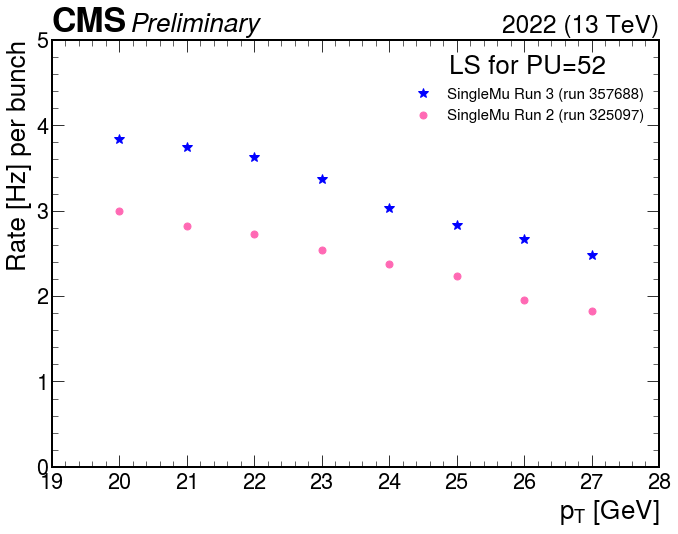

In [5]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_LS_Run3 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run3, '*', color="blue", markersize=10, label = "SingleMu Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleMu Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 28.)
plt.ylim(0., 5.)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
plt.tight_layout()
#plt.show()
plt.savefig('singleMu.pdf', dpi=1200)
plt.savefig('singleMu.png', dpi=1200)

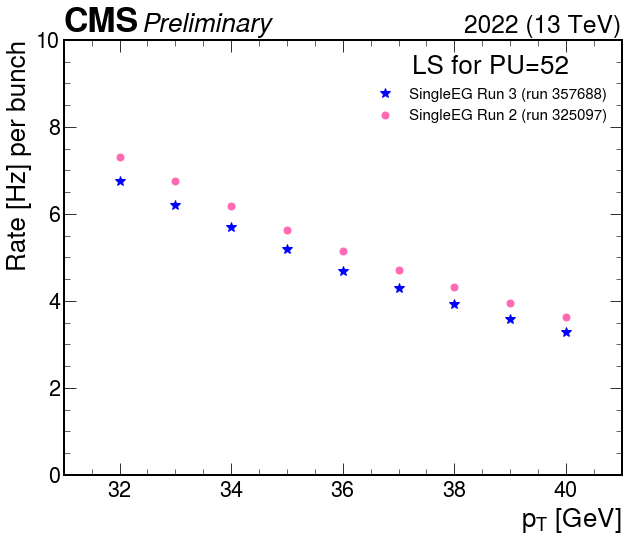

In [6]:
p_eg_LS_Run3, p_eg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_eg_LS_Run3 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run3, '*', color="blue", markersize=10, label = "SingleEG Run 3 (run 357688)")
p_eg_LS_Run2 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(31., 41.)
plt.ylim(0., 10.)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleEG.pdf', dpi=1200)
plt.savefig('singleEG.png', dpi=1200)

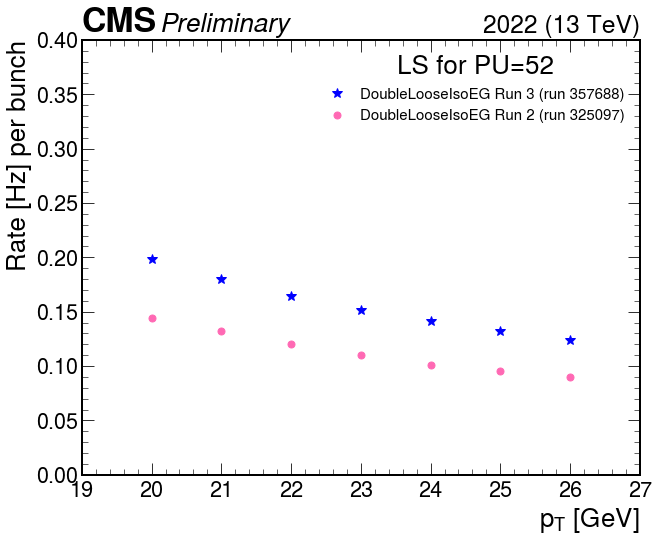

In [7]:
p_twoeg_LS_Run3, p_twoeg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twoeg_LS_Run3 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run3, '*', color="blue", markersize=10, label = "DoubleLooseIsoEG Run 3 (run 357688)")
p_twoeg_LS_Run2 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run2, '.', color="hotpink", markersize=14, label = "DoubleLooseIsoEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 27.)
plt.ylim(0., 0.4)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('doubleLooseIsoEG.pdf', dpi=1200)
plt.savefig('doubleLooseIsoEG.png', dpi=1200)

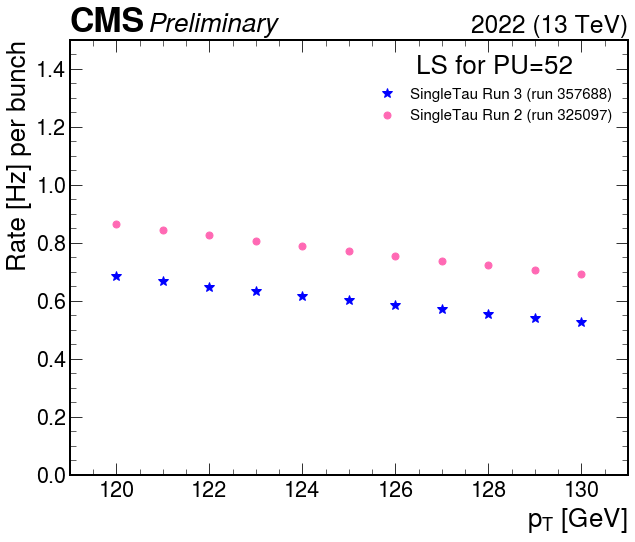

In [8]:
p_tau_LS_Run3, p_tau_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_tau_LS_Run3 = plt.plot(tau_pt_thresholds, rate_tau_algo_Run3, '*', color="blue", markersize=10, label = "SingleTau Run 3 (run 357688)")
p_tau_LS_Run2 = plt.plot(tau_pt_thresholds, rate_tau_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleTau Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(119., 131.)
plt.ylim(0., 1.5)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleTau.pdf', dpi=1200)
plt.savefig('singleTau.png', dpi=1200)

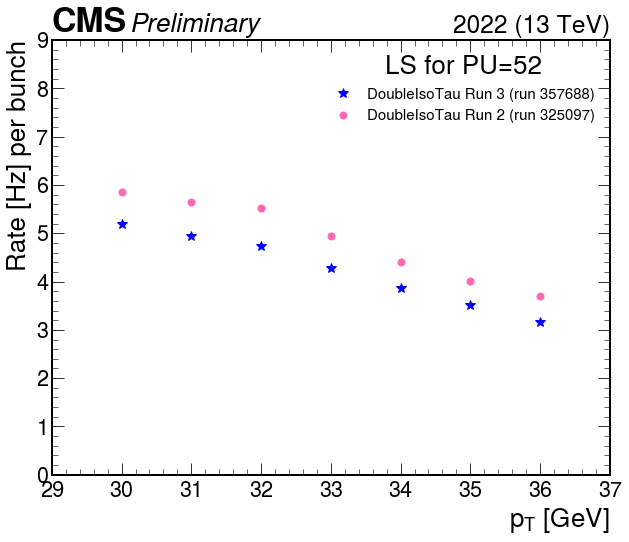

In [9]:
p_twotau_LS_Run3, p_twotau_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twotau_LS_Run3 = plt.plot(doubleisotau_pt_thresholds, rate_doubleisotau_algo_Run3, '*', color="blue", markersize=10, label = "DoubleIsoTau Run 3 (run 357688)")
p_twotau_LS_Run2 = plt.plot(doubleisotau_pt_thresholds, rate_doubleisotau_algo_Run2, '.', color="hotpink", markersize=14, label = "DoubleIsoTau Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(29., 37.)
plt.ylim(0., 9.)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('doubleIsoTau.pdf', dpi=1200)
plt.savefig('doubleIsoTau.png', dpi=1200)

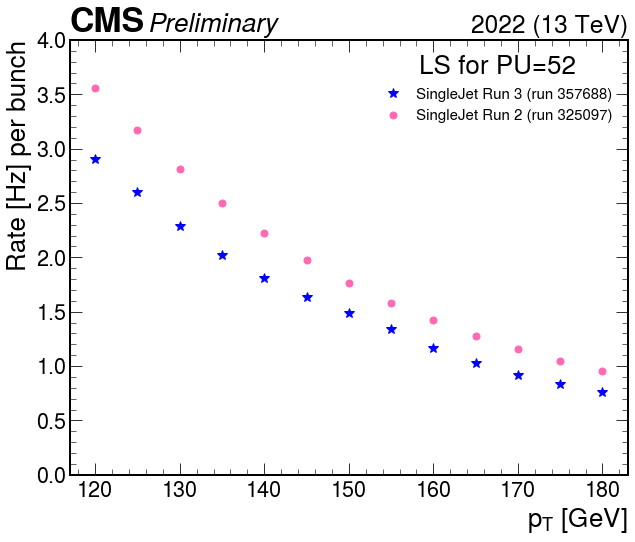

In [10]:
p_jet_LS_Run3, p_jet_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_jet_LS_Run3 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run3, '*', color="blue", markersize=10, label = "SingleJet Run 3 (run 357688)")
p_jet_LS_Run2 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleJet Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(117., 183.)
plt.ylim(0., 4)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleJet.pdf', dpi=1200)
plt.savefig('singleJet.png', dpi=1200)

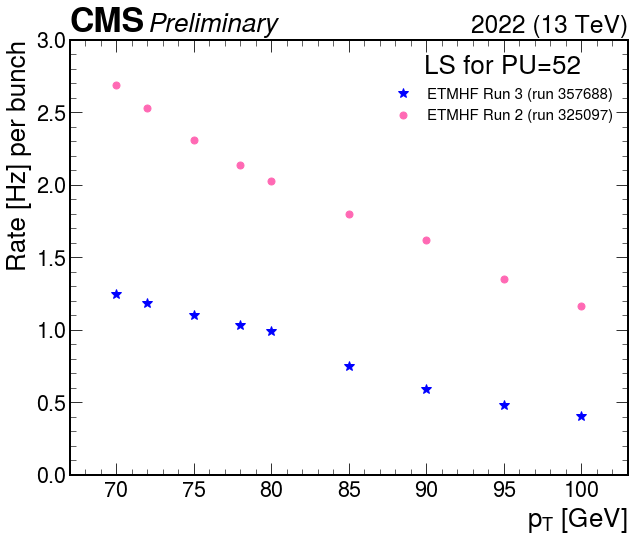

In [11]:
p_met_LS_Run3, p_met_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_met_LS_Run3 = plt.plot(met_thresholds, rate_met_algo_Run3, '*', color="blue", markersize=10, label = "ETMHF Run 3 (run 357688)")
p_met_LS_Run2 = plt.plot(met_thresholds, rate_met_algo_Run2, '.', color="hotpink", markersize=14, label = "ETMHF Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(67., 103.)
plt.ylim(0., 3)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('ETMHF.pdf', dpi=1200)
plt.savefig('ETMHF.png', dpi=1200)